# Майнор по Анализу Данных, Группа ИАД-2
## 22/02/2017 Линейная классификация

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,6)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

In [ ]:
try:
    from ipywidgets import interact, IntSlider, fixed
except ImportError:
    print u'Так надо'

## Задача классификации

На прошлом семинаре мы рассматривали модели регрессии - случай, в котором необходимо было предсказать вещественную переменную $y \in \mathbb{R}^n$ (Стоимость автомобиля, стоимость жилья, размер мозга, объемы продаж и тп.)

В задаче классификации переменная $y$ - содержит метку принадлежности к классу, как, например, это было в задаче с наивным байесом - категорию текстов. Частный случай задачи классификации - бинарная классификация $y = \{-1, 1\}$. Например: является ли клиент банка кредитоспособным, доброкачественная ли опухоль, сообщение - SPAM или HAM?

Спрашивается, почему бы нам не взять, да и построить обычную регрессию на метки класса $y$?<br/>
Загрузите [данные](https://www.dropbox.com/s/g3s1drtaxqwthw1/crx.data?dl=0) о кредитовании. Они достаточно сильно анонимизированны и еще не до конца подходят для применения, но сейчас это нам не помешает. Постройте график наблюдений в координатах `y` и `a15`

In [ ]:
df = pd.read_csv('crx.data',index_col=None) 
df.head()

In [ ]:
df.plot(x='a15', y='y', kind='scatter')

Почему бы не обучить по этим данным регрессию, предстказывающую значение $y$? Да потому что это ~~бред~~ не очень корректно!

## Немного теории

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/512px-Svm_separating_hyperplanes_%28SVG%29.svg.png'>

Нам надо найти уравнение прямой (гиперплоскости), которая бы могла разделить два класса ($H_2$ и $H_3$ подходят). В данном случае, уравнение прямой задаётся как: $$g(x) = w_0 + w_1x_1 + w_2x_2 = \langle w, x \rangle =  w^\top x$$

* Если $g(x^*) > 0$, то $y^* = \text{'черный'}$
* Если $g(x^*) < 0$, то $y^* = \text{'белый'}$
* Если $g(x^*) = 0$, то мы находимся на линии
* т.е. решающее правило: $y^* = sign(g(x^*))$

Некоторые геометрические особенности
* $\frac{w_0}{||w||}$ - расстояние от начала координат то прямой
* $\frac{|g(x)|}{||w||}$ - степень "уверенности" в классификациий
* Величину $M = y\langle w, x \rangle = y \cdot g(x)$ называют **отступом**(margin)

Если для какого-то объекта $M \geq 0$, то его классификация выполнена успешно.

Отлично! Значит нам надо просто минимизировать ошибки классификации для всех объектов:

$$L(w) = \sum_i [y^{(i)} \langle w, x^{(i)} \rangle < 0] \rightarrow \min_w$$
Проблема в том, что это будет комбинаторная оптимизация. Существуют различные аппроксимации этой функции ошибок:

<img src='http://jaquesgrobler.github.io/Online-Scikit-Learn-stat-tut/_images/plot_sgd_loss_functions_11.png'>

### Знакомьтесь - Логистической регрессия!

Перед тем как мы начнем, рассмотрим функцию $$\sigma(z) = \frac{1}{1 + exp{(-z)}},$$она называется **сигмойда**. Постройте данную фукнцию.

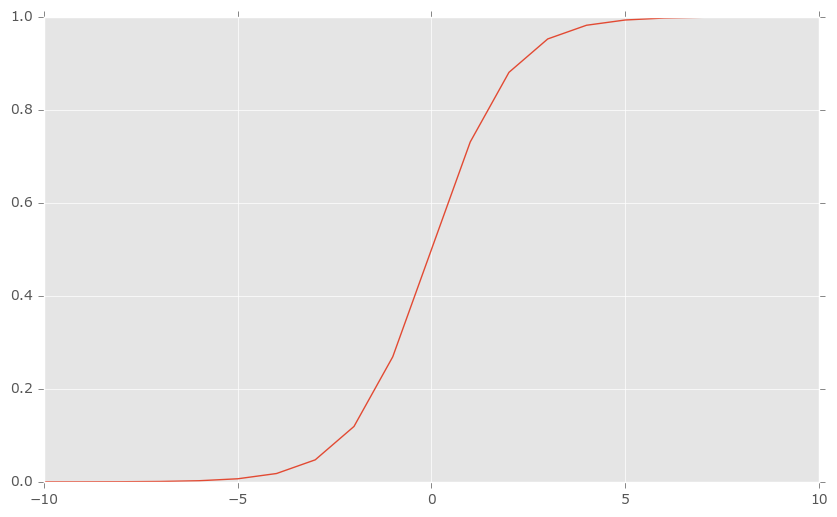

In [3]:
# Your code here
def sigmoid(z):
    return 1./(1+np.exp(-z))

z = np.arange(-10, 10)
s = sigmoid(z)

plt.plot(z, s)

Можно несколькими способами представить линейную регрессию. Один из самых простых - вот какой.

Рассмотрим принадлежность к классу $y=\pm1$ некого объекта $x$: $p(y=\pm1 | x,w)$ и выразим её через **сигмойду** от **отступа**:
$$p(y=\pm1|x,w) = \sigma(y \langle w, x \rangle) $$

А ошибка, которую мы будем минимизировать - логарифмическая:

$$L(w) = -\sum_i \log(\sigma(y^{(i)} \langle w, x^{(i)} \rangle)) \rightarrow \min_w$$

**История с регуляризацией, мультиколлинеарностью и шкалированием признаков здесь полностью повторяется!**

### Пример

Сгенерируем выборку и опробуем логистическую регрессию

In [4]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

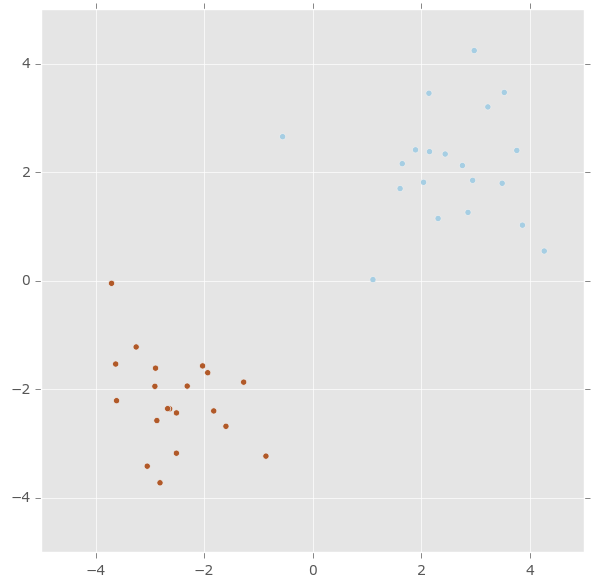

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)

In [6]:
from sklearn.linear_model import LogisticRegression

Обучите логистическую регрессию на этих данных и нарисуйте разделяющую гиперплоскость

In [7]:
model = LogisticRegression(C=1.0, 
                           fit_intercept=True, 
                           penalty='l2')
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
print 'w_0 = %f' % model.intercept_
print 'w_1, w_2 = ', model.coef_

w_0 = -0.183954
w_1, w_2 =  [[-1.06097157 -1.00171289]]


In [13]:
# Нарисуем эту гиперплоскость
w_0 = model.intercept_[0]
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]

x_1 = np.linspace(-4, 4, 10)
x_2 = - (w_0 + w_1*x_1)/w_2

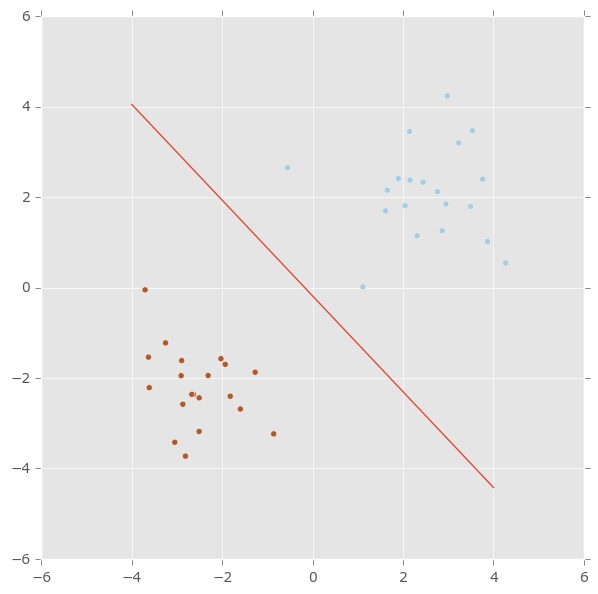

In [14]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)
plt.plot(x_1, x_2)

In [15]:
y_hat = model.predict(X)
y_hat[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [16]:
y_hat_proba = model.predict_proba(X)
y_hat_proba[:10, :]

array([[  9.98616528e-01,   1.38347180e-03],
       [  9.99496019e-01,   5.03981209e-04],
       [  9.95091160e-01,   4.90883960e-03],
       [  9.94323473e-01,   5.67652674e-03],
       [  9.90157090e-01,   9.84290974e-03],
       [  9.97319087e-01,   2.68091305e-03],
       [  9.94720579e-01,   5.27942062e-03],
       [  9.94026880e-01,   5.97312006e-03],
       [  9.96628393e-01,   3.37160720e-03],
       [  9.77815343e-01,   2.21846572e-02]])

In [17]:
dec_func = model.decision_function(X)
dec_func[:10]

array([-6.58177471, -7.59246747, -5.31179677, -5.16572302, -4.61111223,
       -5.91891334, -5.23864551, -5.11449484, -5.68898843, -3.78591991])

### Как сделать нелинейную границу?

Рассмотрим набор данных, который в простонародье называют "Бублик".

In [18]:
from sklearn.datasets import make_circles

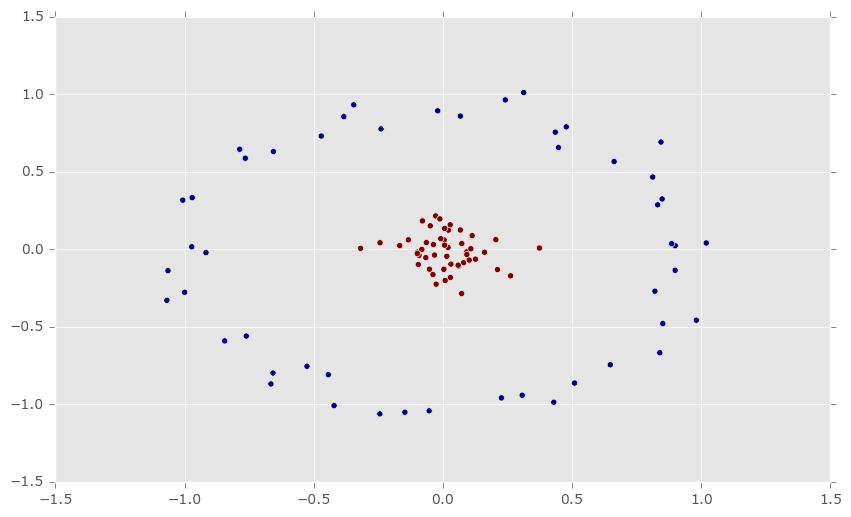

In [19]:
X, y = make_circles(n_samples=100, shuffle=True,
                    noise = 0.1,
                    factor=0.1)

plt.scatter(X[:, 0],
            X[:, 1],
            c=y)

Очевидно, что классы нельзя разделить линией. Но можно сделать это окружностью! </br>
Т.е. разделяющся линия теперь будет задаваться не уравнением прямой $g(x) = w_0 + w_1x_1 + w_2x_2$, а уравнением окружности $c(x) = (x_1 - a)^2 + (x_2 - b)^2 - R^2$. 

Выполните преобразование матрицы X, чтобы в ней были столбцы для $x_1$, $x^2_1$, $x_2$, $x^2_2$ и обучите логистическую регрессию

In [20]:
X_new = np.c_[X[:,0], X[:,1], X[:,0]**2, X[:,1]**2]
model = LogisticRegression(C=100000, 
                           fit_intercept=True)
model.fit(X_new, y)

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [25]:
# Посчитаем количество ошибок
y_hat = model.predict(X_new)
(y != y_hat).sum()

0

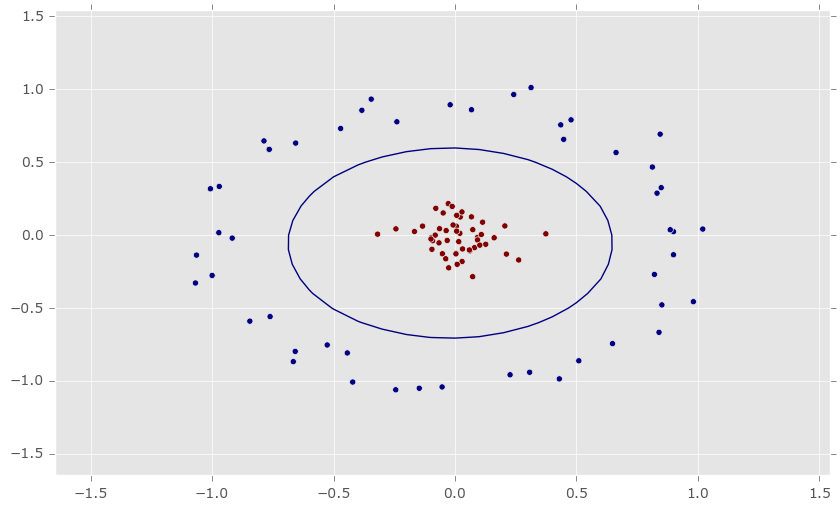

In [26]:
# Нарисуем полученную окружность

x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.1),
                       np.arange(-1.5, 1.5, 0.1))
xx0, xx1 = x0.ravel(), x1.ravel()

X_grid = np.c_[xx0, xx1, xx0**2, xx1**2]

y_hat = model.decision_function(X_grid)
y_hat = y_hat.reshape(x0.shape)

plt.contour(x0, x1, y_hat, levels=[0])
plt.scatter(X[:,0], 
            X[:, 1], 
            c=y)

## Задача на "реальных" данных

### Предобработка данных

Вновь [данные](https://www.dropbox.com/s/jeijgsga8w55c8w/crx.data?dl=0) по кредитованию.

Столбец с классом называется `y`.<br/> Значение $1$ соответствует классу клиентов банка, которым выдали кредит и они его успешно вернули.<br/> Значение $-1$ соответствует клиентам, невыполнившим свои кредитные обязанности. 

В банке хотят уметь определять по признакам `a1-a15`, сможет ли новый клиент вернуть кредит или нет? То есть нам надо обучить классификатор! *Обычно, в банках используют скор-карты, но процесс их построения тесно связан с логистической регрессией*

Загрузите данные и преобразуйте признаки `a1`, `a9`, `a10` и `a12` из строковых в числовые. В них только 2 возможных значения. Для этого можно использовать функцию DataFrame.replace() в `pandas` или самое обычное присваивание на соответствующих строках.

In [ ]:
# Your code here

В признаках `a6`, `a7` присутствуют "редкие" значение. Найдите их с помощью фунцкии `.value_counts()`  и объедините, присвоив им одно и то же значение, например `'Other'`.

In [ ]:
# Your code here

Выделите бинарные признаки `a1`, `a9`, `a10` и `a12` в матрицу `X_binary`

Преобразуйте категориальные признаки `a5`, `a6`, `a7`, `a13` с помощью `DictVectorizer`. Вы должны получить матрицу `X_cat`.

Нормализуйте количественные признаки `a2`, `a3`, `a8`, `a11`, `a14` и `a15` с помощью `StandartScaler` или вручную. Вы должны получить матрицу `X_real`.

Матрица `X_cat` будет sparse-матрицой (разреженной). Преобразуте её в полную матрицу с помощью команд `X_cat = X_cat.toarray()` или `X_cat = X_cat.todence()`

Используйте функцию np.concatinate(..) или np.c[..] чтобы сцепить матрицы `X_binary`, `X_cat` и `X_real`

В результате вы должны получить матрицу с преобразованными призанками `X` и вектор ответов `y`

In [ ]:
# Your code here

### Исследование влияния регуляризации

В случае с логистичесткой регресии, сложность модели выражается в значениях весов $w_j$ при признаках. Больший вес означает большее влияние признака на результат. В таком случае, давайте добавил штрафное слагаемое в функцию оптимизации для логистической регресии. Самый распространенные из них это:

* Ridge regression
$$L(w) = - \left(\sum_i \log(\sigma(y^{(i)} \langle w, x^{(i)} \rangle)) + \frac{1}{C}\sum_j w_j^2\right) \rightarrow \min_w$$

* Lasso regression
$$L(w) = -\left(\sum_i \log(\sigma(y^{(i)} \langle w, x^{(i)} \rangle) + \frac{1}{C}\sum_j |w_j|\right) \rightarrow \min_w$$

$C$ - называется гиперпараметром регуляризации и он задается вручную. Выбирается он с помощью кросс-валидации. Чем больше $С$ - тем меньше влияние регуляризации.


Разделите ваши даннные на обучающую и контрольную выборку в пропорции 70/30 соответственно.



Lasso regression называется так, потому что она осуществляет "отлов" признаков - т.е. незначимые признаки будут иметь нулевые веса в модели, в то время как в Ridge regression - веса будут постепенно падать у всех признаков.

<img src='http://webdancer.is-programmer.com/user_files/webdancer/Image/lasso.png'>

Давайте сравним работу регуляризаторов. 

1. Разбейте данные на обучающую и валидационную выборки в пропорции 70\30.
1. Для $C$ из набора np.logspace(-3, 3, 10) обучите LogisctigRegression c Lasso регуляризацией (`penalty='l1'`). На каждой итерации оцените качество (ROC-AUC) на валидационной выборке и запомните полученные коэффициенты модели
1. На одном графике выведите значение качества в зависимости от параметра `C` 
1. На другом графике для каждого признака выведите значение коэффициента в модели в зависимости от параметра `C`
1. Проделайте тоже самое для Ridge регуляризации (`penalty='l2'`)

In [ ]:
# Your code here